# Logistic regression demo

In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

lda = LinearDiscriminantAnalysis(store_covariance=True)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

## 1 Toy example (use body height to predict male/female)

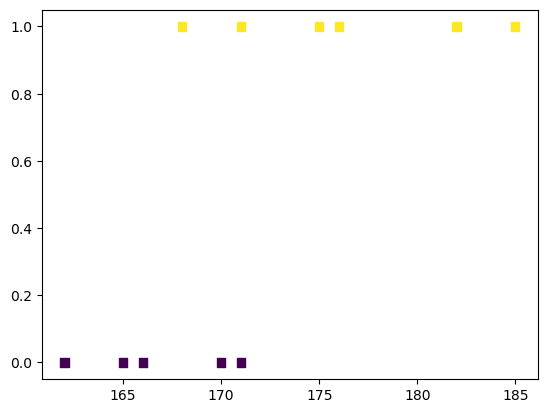

In [2]:
x = np.transpose(np.array([[162, 165, 166, 170, 171, 168, 171, 175, 176, 182, 185]]))
y = np.transpose(np.array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]))

plt.scatter(x, y, c=y, marker='s');

In [3]:
LRmodel = linear_model.LogisticRegression(penalty=None).fit(x, y.ravel())
print(LRmodel.intercept_)  # location parameter (theta_0)
print(LRmodel.coef_)   # scale parameter (theta_1)

[-84.83327287]
[[0.49853637]]


In [4]:
LRprobs = LRmodel.predict_proba(x)  # fitted probabilities [P(Y=0), P(Y=1)]
print(LRprobs)

[[9.83215652e-01 1.67843477e-02]
 [9.29220235e-01 7.07797654e-02]
 [8.88571922e-01 1.11428078e-01]
 [5.20511180e-01 4.79488820e-01]
 [3.97367605e-01 6.02632395e-01]
 [7.46335655e-01 2.53664345e-01]
 [3.97367605e-01 6.02632395e-01]
 [8.23686343e-02 9.17631366e-01]
 [5.17042031e-02 9.48295797e-01]
 [2.73101936e-03 9.97268981e-01]
 [6.13354044e-04 9.99386646e-01]]


In [5]:
pred = LRmodel.predict(x)  # prediction of labels
print(pred)

[0 0 0 0 1 0 1 1 1 1 1]


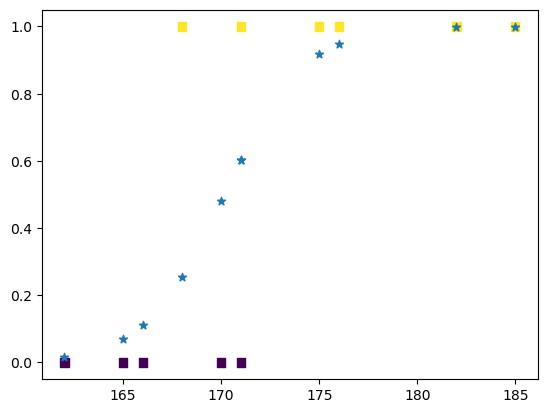

In [6]:
plt.scatter(x, y, c=y, marker='s');
plt.scatter(x,LRprobs[:,1],marker='*');

In [7]:
lda.fit(x, y.ravel())

lda.predict(x)

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [8]:
Z_lda = lda.predict_proba(x)

Z_lda

array([[0.94650923, 0.05349077],
       [0.8706425 , 0.1293575 ],
       [0.8298331 , 0.1701669 ],
       [0.57337103, 0.42662897],
       [0.49335331, 0.50664669],
       [0.71910604, 0.28089396],
       [0.49335331, 0.50664669],
       [0.21158214, 0.78841786],
       [0.16278895, 0.83721105],
       [0.02736187, 0.97263813],
       [0.01058704, 0.98941296]])

In [9]:
lda.means_

array([[166.8       ],
       [176.16666667]])

In [10]:
lda.covariance_

array([[23.78484848]])

In [11]:
qda.fit(x, y.ravel())

print(qda.means_)

print(qda.covariance_)


[[166.8       ]
 [176.16666667]]
[array([[13.7]]), array([[41.36666667]])]


# 2 Simulated data

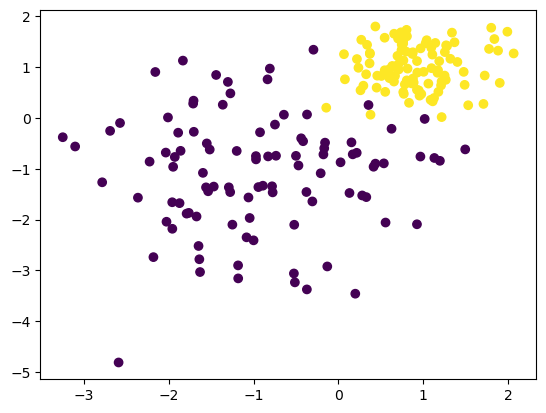

In [12]:
X1 = np.random.randn(100,2) + [-1,-1]
X2 = np.random.randn(100,2)*0.5 + [1,1]
X = np.concatenate((X1, X2), axis=0)
truelabels = np.repeat([0,1], 100)
k = 2

n = X.shape[0]  # number of data points

plt.scatter(x=X[:,0], y=X[:,1], c=truelabels);   # plot the data

In [13]:
LRmodel = linear_model.LogisticRegression(penalty=None).fit(X, truelabels.ravel())
LRprobs = LRmodel.predict_proba(X)  # fitted probxabilities

In [14]:
LRmodel.coef_

array([[3.97646995, 5.34053968]])

In [15]:
LRmodel.intercept_

array([-2.86385259])

In [16]:
np.sum(LRmodel.predict(X)-truelabels.ravel() != 0)

4

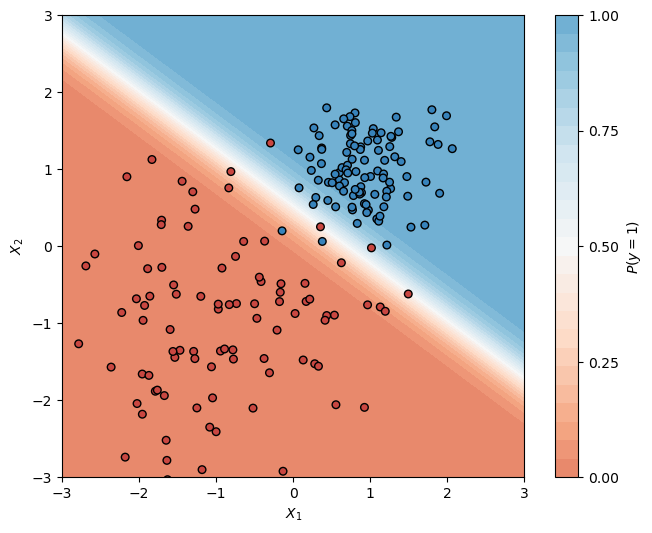

In [17]:
# Next, make a continuous grid of values and evaluate the probability of each (x, y) point in the grid:

xx, yy = np.mgrid[-3.5:3.5:.01, -3.5:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
LRprobs = LRmodel.predict_proba(grid)[:, 1].reshape(xx.shape)

# Now, plot the probability grid as a contour map and additionally show the test set samples on top of it:

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, LRprobs, 30, cmap="RdBu", vmin=-0.5, vmax=1.5)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:,1], c=truelabels, s=30,
           cmap="RdBu", vmin=-0.25, vmax=1.25,
           edgecolor="black", linewidth=1);

ax.set(aspect="equal",
       xlim=(-3, 3), ylim=(-3, 3),
       xlabel="$X_1$", ylabel="$X_2$");

# LDA/QDA

In [18]:
lda.fit(X, truelabels.ravel())

np.sum(lda.predict(X)-truelabels.ravel() != 0)

9

In [19]:
lda.means_

array([[-0.94414763, -1.08715608],
       [ 0.91575623,  0.99636892]])

In [20]:
lda.covariance_

array([[0.6160862 , 0.02408263],
       [0.02408263, 0.72032635]])

In [21]:
qda.fit(X, truelabels.ravel())

np.sum(qda.predict(X)-truelabels.ravel() != 0)

4

In [22]:
qda.means_

array([[-0.94414763, -1.08715608],
       [ 0.91575623,  0.99636892]])

In [23]:
qda.covariance_

[array([[1.03985487, 0.03136716],
        [0.03136716, 1.27135811]]),
 array([[0.20476373, 0.01728462],
        [0.01728462, 0.18384665]])]

### Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X, truelabels.ravel())

GaussianNB()

### Plotting together

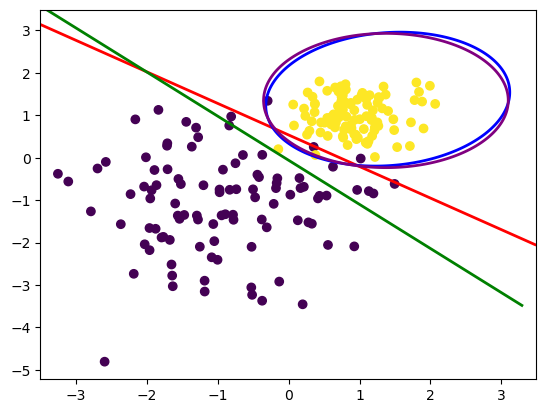

In [25]:
from matplotlib import colors

xx, yy = np.mgrid[-3.5:3.5:.01, -3.5:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

Z_lda = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_lda = Z_lda[:, 1].reshape(xx.shape)

Z_qda = qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_qda = Z_qda[:, 1].reshape(xx.shape)

Z_gnb = GNB.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_gnb = Z_gnb[:, 1].reshape(xx.shape)

plt.scatter(x=X[:,0], y=X[:,1], c=truelabels);   # plot the data

plt.contour(xx, yy, LRprobs, [0.5], linewidths=2.0, colors="red")  # logistic
plt.contour(xx, yy, Z_lda, [0.5], linewidths=2.0, colors="green")  # LDA
plt.contour(xx, yy, Z_qda, [0.5], linewidths=2.0, colors="blue")   # QDA
plt.contour(xx, yy, Z_gnb, [0.5], linewidths=2.0, colors="purple") # GaussianNB
#plt.legend(['LR','LDA','QDA', 'GNB'])